In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
publishGroup = df.groupby(['Publisher']).sum().loc[:,'NA_Sales':'Global_Sales']
publishGroup.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,7.585484,4.203201,2.231990,1.379031,15.407543
std,50.945308,28.403918,20.822269,9.042524,103.251959
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.070000
50%,0.090000,0.040000,0.010000,0.010000,0.320000
75%,0.750000,0.297500,0.170000,0.097500,1.630000
max,816.870000,418.740000,455.420000,129.770000,1786.560000


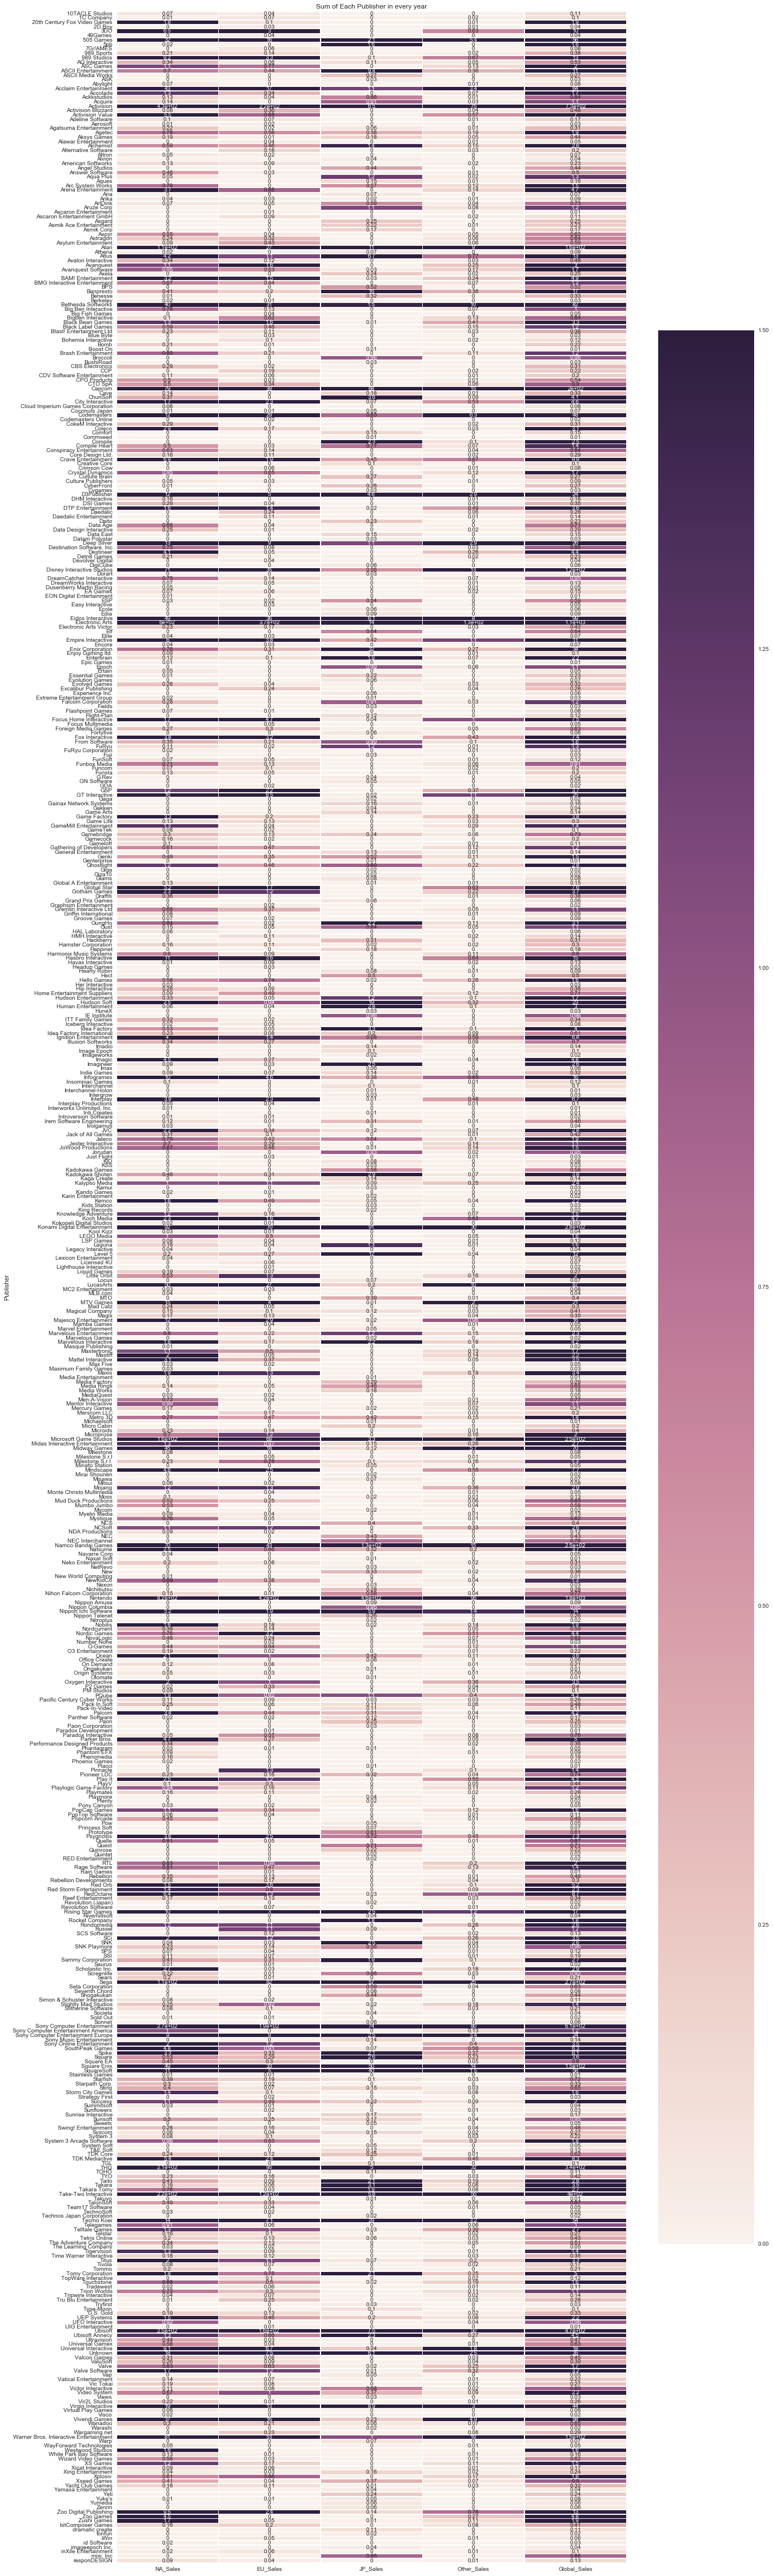

In [5]:
plt.figure(figsize=(20,80))
sns.heatmap(publishGroup, linewidths=0.5, annot=True, vmax=1.5)
plt.title("Sum of Each Publisher in every year")

In [6]:
def top(df, column = 'Global_Sales'):
    return df.sort_values(by = column)[-1:]

In [7]:
df.groupby(['Year']).apply(top)

,,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,,,
1980,258,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1981,239,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
1982,89,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
1983,421,422,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
1984,9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1985,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1986,127,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
1987,251,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
1988,22,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28


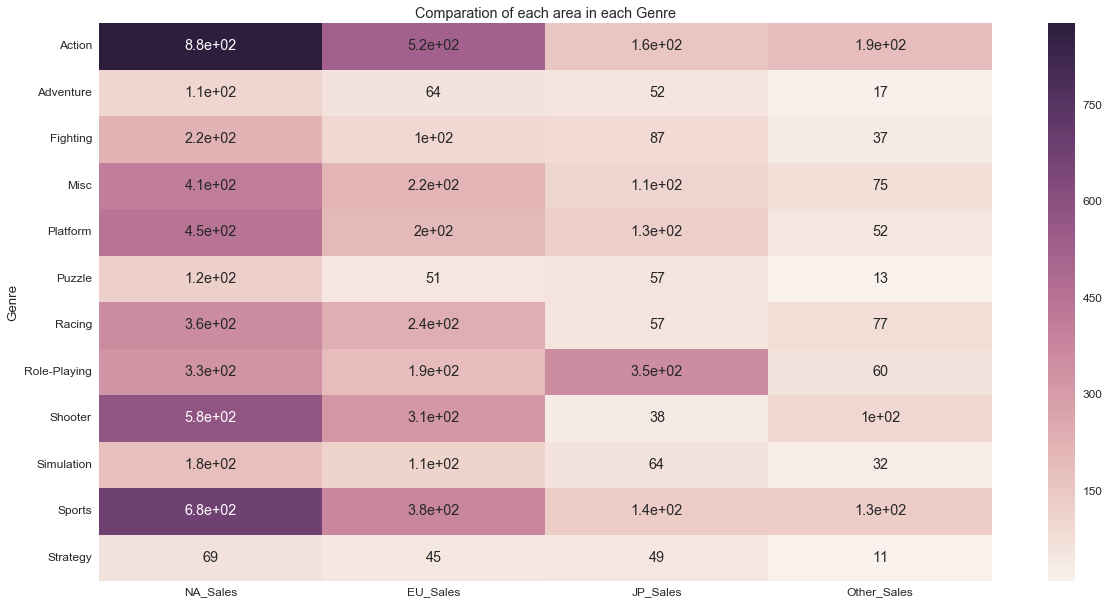

In [128]:
GenreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True)
plt.title("Comparation of each area in each Genre")

In [9]:
GenreGroup['Global_Sales']

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

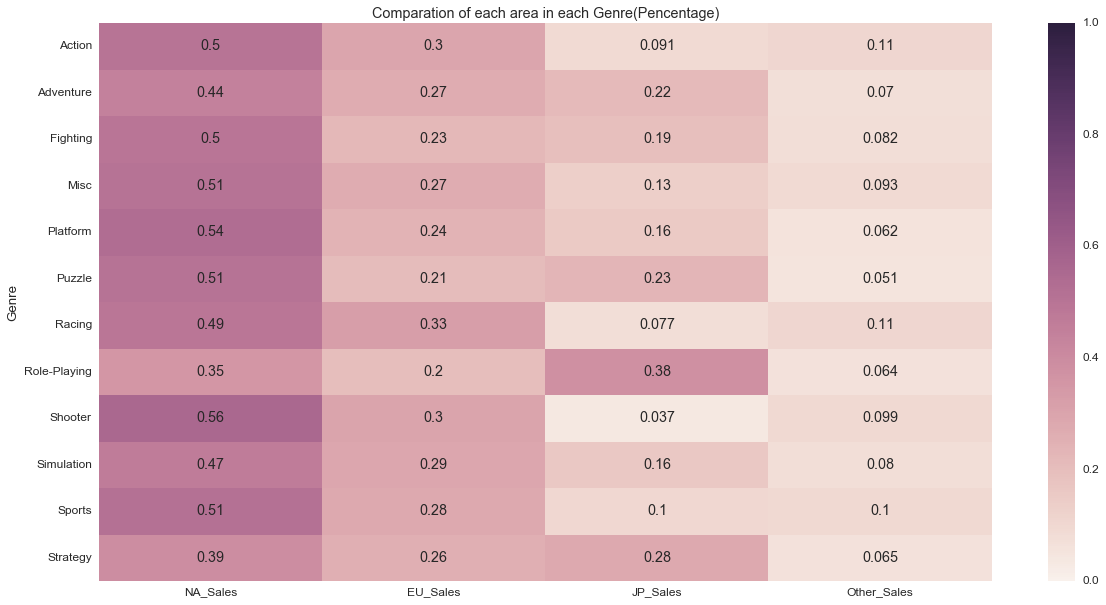

In [143]:
GenreGroupGen = pd.DataFrame()
GenreGroupGen['NA_Sales'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroupGen['EU_Sales'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroupGen['JP_Sales'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroupGen['Other_Sales'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 10))
sns.heatmap(GenreGroupGen, vmax =1, vmin=0, annot=True)
plt.title("Comparation of each area in each Genre(Pencentage)")

In [11]:
variGenre = pd.pivot_table(df, values='Global_Sales', columns=['Genre'], index=['Publisher'], aggfunc=np.std)
variGenre['total'] = df.groupby(['Publisher']).std()[['Global_Sales']]
variGenre.dropna(how='all', axis=0, inplace=True)
variGenre.sort_values(by = 'total', ascending=False)[:20]

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,total
Publisher,,,,,,,,,,,,,
Nintendo,2.132919,1.969248,3.478110,3.810897,6.205187,3.971818,7.007623,5.037014,5.567466,5.052253,12.306136,1.146332,5.653126
Microsoft Game Studios,0.657451,0.201080,0.726175,3.957288,0.318167,NaN,1.523956,1.585475,3.576420,1.227686,1.486611,0.605040,2.533109
Take-Two Interactive,4.394556,1.104627,NaN,0.834750,0.310975,NaN,1.040778,1.704880,0.870733,0.294208,0.657275,0.408476,2.300276
RedOctane,NaN,NaN,NaN,2.181758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181758
Bethesda Softworks,0.588290,NaN,NaN,NaN,NaN,NaN,0.461044,2.568078,0.479531,0.049497,0.297187,0.007071,1.735421
Sony Computer Entertainment Europe,NaN,0.704060,NaN,1.860878,0.662344,NaN,NaN,NaN,NaN,1.032376,NaN,NaN,1.682806
Activision,0.607454,0.174874,0.275525,0.968754,0.707374,0.159523,0.222691,1.364275,3.431580,0.389416,0.832220,1.331793,1.633724
Sony Computer Entertainment,1.511818,0.577590,1.695107,0.854050,1.843524,0.379772,3.110677,1.924307,1.147567,0.510633,0.566213,0.218611,1.557466
SquareSoft,NaN,NaN,0.207103,NaN,NaN,NaN,NaN,1.493718,NaN,NaN,0.277308,0.208066,1.355938


In [12]:
yearPlatfrom = pd.pivot_table(df, values='Global_Sales', columns=['Platform'], index=['Year'], aggfunc=np.sum)
yearPlatfrom

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.75,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


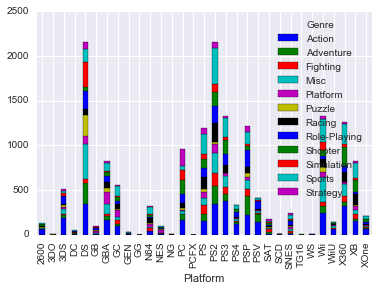

In [111]:
platGenre = pd.crosstab(df.Platform,df.Genre)
plt.figure()
platGenre.plot.bar(stacked=True)
plt.show()

In [112]:
platGenre['Total'] = platGenre.sum(axis=1)
platGenre[platGenre['Total']>1000]

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
PS,157,69,108,76,64,32,145,97,96,60,222,70,1196
PS2,348,196,150,222,103,18,216,187,160,90,400,71,2161
PS3,380,74,76,124,37,3,92,119,156,31,213,24,1329
PSP,222,213,74,106,36,44,65,192,37,29,135,60,1213
Wii,238,84,42,280,58,55,94,35,66,87,261,25,1325
X360,324,47,65,126,24,7,105,76,203,40,220,28,1265


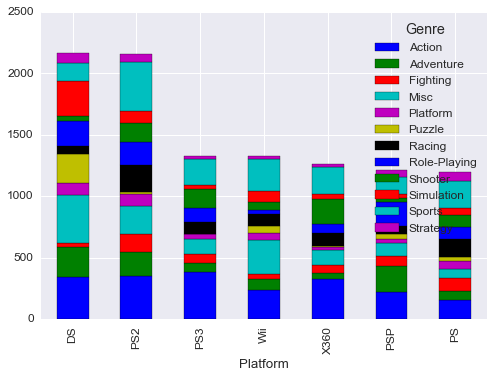

In [132]:
popPlatform = platGenre[platGenre['Total']>1000].sort_values(by='Total', ascending = False)
popPlatform.loc[:,:'Strategy'].plot.bar(stacked = True)
plt.show()

In [116]:
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()

In [117]:
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
popPlatformfinal

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
PS2,348,196,150,222,103,18,216,187,160,90,400,71,2161
PS3,380,74,76,124,37,3,92,119,156,31,213,24,1329
Wii,238,84,42,280,58,55,94,35,66,87,261,25,1325
X360,324,47,65,126,24,7,105,76,203,40,220,28,1265
PSP,222,213,74,106,36,44,65,192,37,29,135,60,1213
PS,157,69,108,76,64,32,145,97,96,60,222,70,1196
total,2012,923,551,1327,414,397,784,906,760,622,1599,357,10652


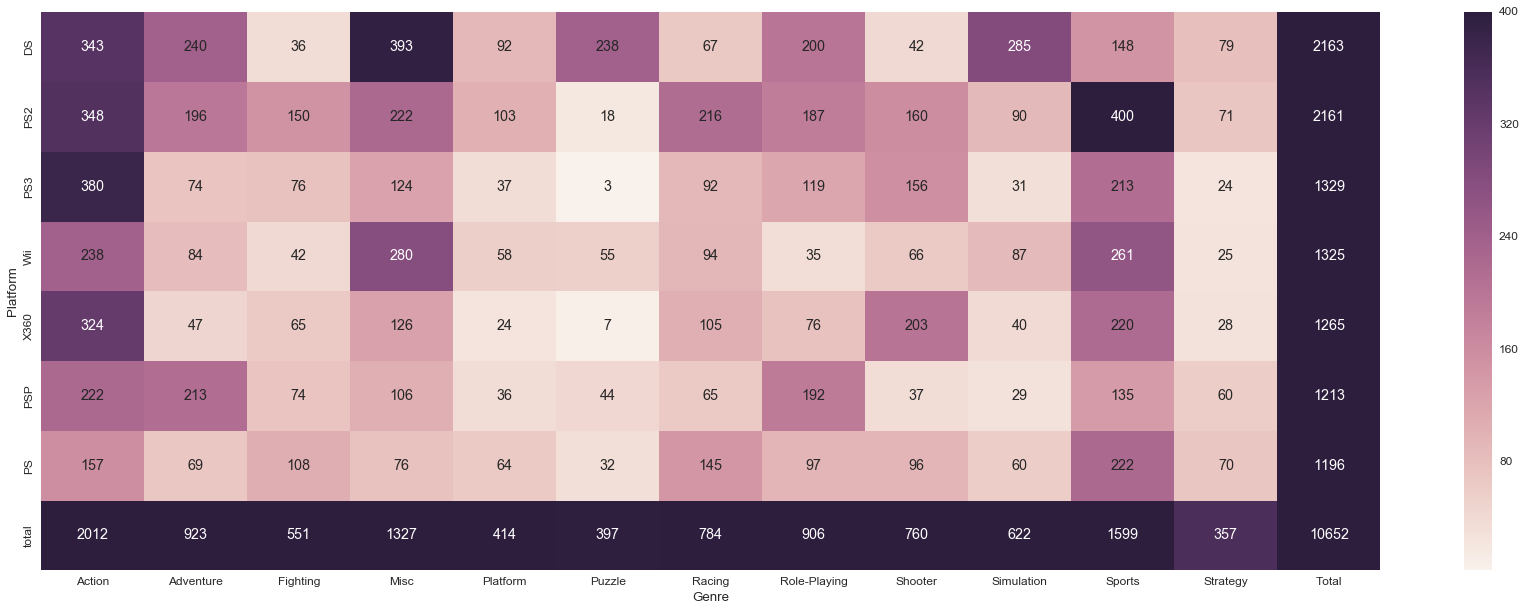

In [129]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30,10))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.show()